# 4.10.2 Final Visualizations

## This script contains the following points:

### 01. Importing Libraries
### 02. Creating Dataframes
### 03. Profile Distributions
### 04. Aggregating Min, Max, and Mean of Customer Profiles
### 05. Customer Profile Visualizations
### 05. Comparing Regions

## 01. Importing Libraries

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

### 02. Creating Dataframes

In [2]:
# Creating path variable for loading flies
path = r'C:\Users\widne\Documents\CareerFoundry Exercises\Data_Immersion\Achievement 4\03-2024 Instacart Basket Analysis'

# Creating customer profile dataframe
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'customer_profiles.pkl'))
dept = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_prepared.csv'), index_col=False)

In [3]:
# Checking dataframe
df.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,...,fam_status,income,region,low_activity,age_group,income_group,profile_age,profile_income,department,_merge
0,2539329,1,1,2,8,NaN,True,196,1,0,...,married,40423,South,no,Middle age,low income,Married middle age w/ kids,Married w/ kids low income,beverages,both
1,2398795,1,2,3,7,15.0,False,196,1,1,...,married,40423,South,no,Middle age,low income,Married middle age w/ kids,Married w/ kids low income,beverages,both
2,473747,1,3,3,12,21.0,False,196,1,1,...,married,40423,South,no,Middle age,low income,Married middle age w/ kids,Married w/ kids low income,beverages,both
3,2254736,1,4,4,7,29.0,False,196,1,1,...,married,40423,South,no,Middle age,low income,Married middle age w/ kids,Married w/ kids low income,beverages,both
4,431534,1,5,4,15,28.0,False,196,1,1,...,married,40423,South,no,Middle age,low income,Married middle age w/ kids,Married w/ kids low income,beverages,both


### 03. Profile Distributions

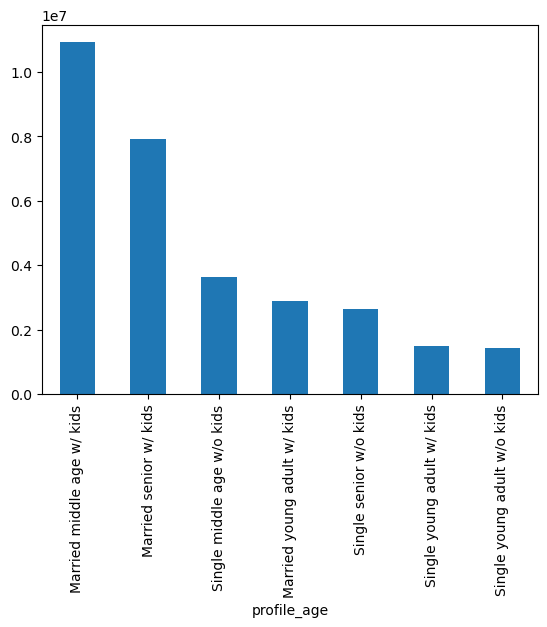

In [7]:
# Creating distribution graph of profile_age
bar_profile_age = df['profile_age'].value_counts(dropna=False).plot.bar()

In [9]:
# Exporting graph
bar_profile_age.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_profile_age_distribution.png'))

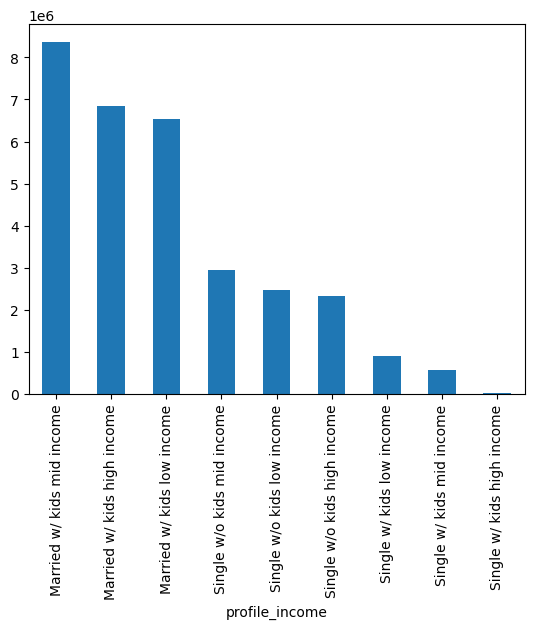

In [8]:
# Creating distribution graph of profile_income
bar_profile_income = df['profile_income'].value_counts(dropna=False).plot.bar()

In [10]:
# Exporting graph
bar_profile_income.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_profile_income_distribution.png'))

## 04. Aggregating Min, Max, and Mean of Customer Profiles

In [13]:
# Aggregating frequency and expenditure of profile_age
profile_age_agg = df.groupby('profile_age')[['days_since_prior_order', 'prices']].agg(['min', 'max', 'mean'])

In [14]:
profile_age_agg

days_since_prior_order                  prices  \
                                               min   max       mean    min   
profile_age                                                                  
Married middle age w/ kids                     0.0  30.0  10.829788    1.0   
Married senior w/ kids                         0.0  30.0  10.817469    1.0   
Married young adult w/ kids                    0.0  30.0  10.796514    1.0   
Single middle age w/o kids                     0.0  30.0  10.771922    1.0   
Single senior w/o kids                         0.0  30.0  10.750328    1.0   
Single young adult w/ kids                     0.0  30.0  10.750995    1.0   
Single young adult w/o kids                    0.0  30.0  10.918571    1.0   

                                             
                              max      mean  
profile_age                                  
Married middle age w/ kids   25.0  7.790997  
Married senior w/ kids       25.0  7.793589  
Married young adult w/ kids  25.0  7.778475  
Single middle age w/o kids   25.0  7.788679  
Single senior w/o kids       25.0  7.801014  
Single young adult w/ kids   25.0  7.800604  
Single young adult w/o kids  25.0  7.770795

In [17]:
# Aggregating frequency anf expenditure of profile_income
profile_income_agg = df.groupby('profile_income')[['days_since_prior_order', 'prices']].agg(['min', 'max', 'mean'])

In [18]:
profile_income_agg

days_since_prior_order                  prices  \
                                               min   max       mean    min   
profile_income                                                               
Married w/ kids high income                    0.0  30.0  10.798805    1.0   
Married w/ kids low income                     0.0  30.0  10.910907    1.0   
Married w/ kids mid income                     0.0  30.0  10.768700    1.0   
Single w/ kids high income                     0.0  30.0   9.153272    1.0   
Single w/ kids low income                      0.0  30.0  10.810986    1.0   
Single w/ kids mid income                      0.0  30.0  10.708635    1.0   
Single w/o kids high income                    0.0  30.0  10.658271    1.0   
Single w/o kids low income                     0.0  30.0  10.907324    1.0   
Single w/o kids mid income                     0.0  30.0  10.800629    1.0   

                                             
                              max      mean  
profile_income                               
Married w/ kids high income  25.0  7.954520  
Married w/ kids low income   25.0  7.408358  
Married w/ kids mid income   25.0  7.954473  
Single w/ kids high income   25.0  7.966809  
Single w/ kids low income    25.0  7.697549  
Single w/ kids mid income    25.0  7.957767  
Single w/o kids high income  25.0  7.944965  
Single w/o kids low income   25.0  7.439104  
Single w/o kids mid income   25.0  7.961655

In terms of the profile_age there does not seem to be any significant differences in the frequency and expenditure of customers.

However in the profile_income, it seems that customers who have a high income tend to have a higher average spend compared to those with mid and low incomes.

## 05. Customer Profile Visualizations

In [14]:
# Comparing products purchased by profile_age
prods_by_profile_age = df.groupby(['department', 'profile_age']).size().unstack()

In [15]:
# Sorting columns
prods_by_profile_age = prods_by_profile_age = prods_by_profile_age.loc[prods_by_profile_age.sum(axis=1).sort_values(ascending=True).index]

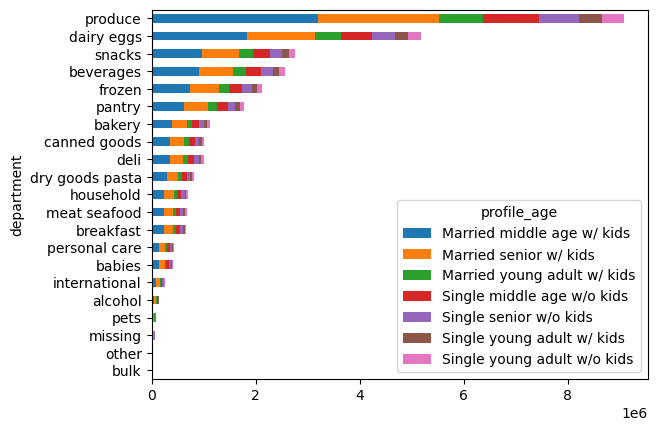

In [16]:
# Creating bar graph
bar_prods_by_profile_age = prods_by_profile_age.plot.barh(stacked=True)

In [17]:
# Exporting graph
bar_prods_by_profile_age.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_prods_by_profile_age.png'))

In [18]:
# Comparing products purchased by profile_income
prods_by_profile_income = df.groupby(['department', 'profile_income']).size().unstack()

In [19]:
# Sorting columns
prods_by_profile_income = prods_by_profile_income.loc[prods_by_profile_income.sum(axis=1).sort_values(ascending=True).index]

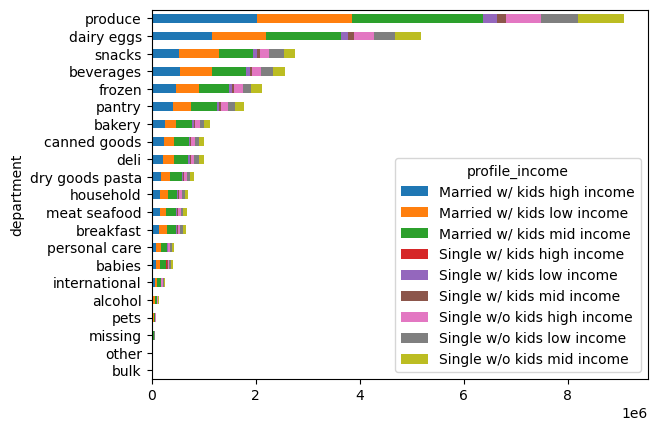

In [20]:
# Creating bar graph
bar_prods_by_profile_income = prods_by_profile_income.plot.barh(stacked=True)

In [21]:
# Exporting graph
bar_prods_by_profile_income.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_prods_by_profile_income.png'))

In [30]:
# Comparing profile_age to regions
profile_age_by_region = df.groupby(['profile_age','region']).size().unstack()

In [37]:
# Sorting columns
profile_age_by_region = profile_age_by_region.loc[profile_age_by_region.sum(axis=1).sort_values(ascending=True).index]

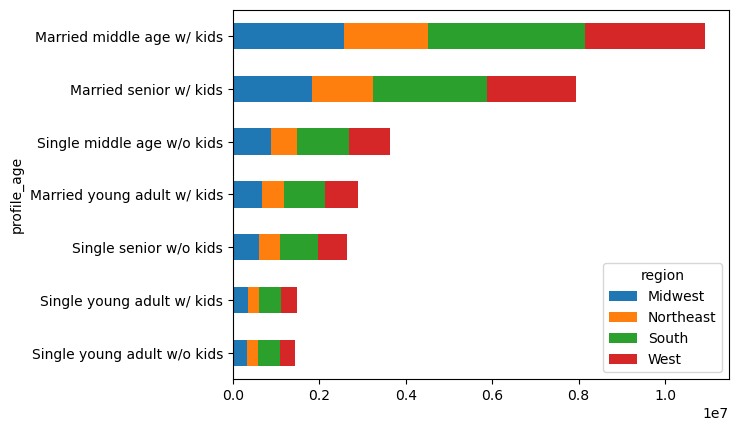

In [38]:
# Creating graph
bar_profile_age_by_region = profile_age_by_region.plot.barh(stacked=True)

In [39]:
# Exporting graph
bar_profile_age_by_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_profile_age_by_region'))

In [33]:
# Comparing profile_income to regions
profile_income_by_region = df.groupby(['profile_income','region']).size().unstack()

In [35]:
# Sorting columns
profile_income_by_region = profile_income_by_region.loc[profile_income_by_region.sum(axis=1).sort_values(ascending=True).index]

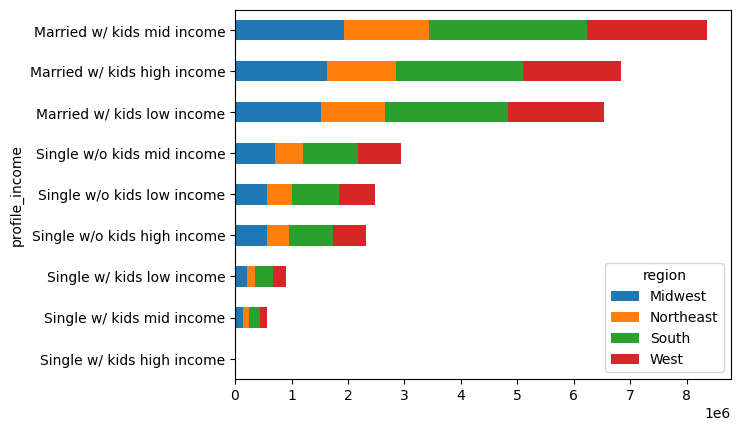

In [36]:
# Creating graph
bar_profile_income_by_region = profile_income_by_region.plot.barh(stacked=True)

In [40]:
# Exporting graph
bar_profile_income_by_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_profile_income_by_region'))

## 06. Comparing Regions

In [4]:
# Creating crosstab to compare profile_age and region
region_agg = df.groupby('region')[['days_since_prior_order', 'prices']].agg(['min', 'max', 'mean'])

In [6]:
region_agg

days_since_prior_order                  prices                
                             min   max       mean    min   max      mean
region                                                                  
Midwest                      0.0  30.0  10.892736    1.0  25.0  7.792318
Northeast                    0.0  30.0  10.774220    1.0  25.0  7.781441
South                        0.0  30.0  10.814227    1.0  25.0  7.794439
West                         0.0  30.0  10.754622    1.0  25.0  7.790308

In [7]:
# Comparing types of products purchased by region
dep_by_region = df.groupby(['department', 'region']).size().unstack()

In [8]:
# Sorting columns
dep_by_region = dep_by_region.loc[dep_by_region.sum(axis=1).sort_values(ascending=True).index]

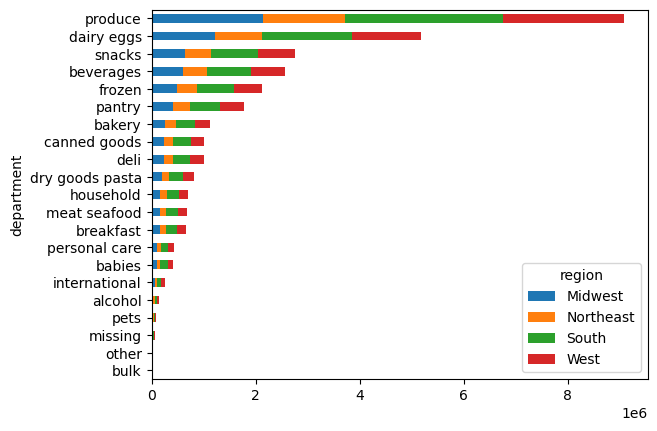

In [9]:
# Creating bar graph
prods_by_region = dep_by_region.plot.barh(stacked=True)

In [10]:
# Exporting graph
prods_by_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_prods_by_region.png'))

In [15]:
# Comparing loyalty status by region
loyalty_by_region = df.groupby(['region','loyalty_flag']).size().unstack()

In [16]:
# Sorting columns
loyalty_by_region = loyalty_by_region.loc[loyalty_by_region.sum(axis=1).sort_values(ascending=True).index]

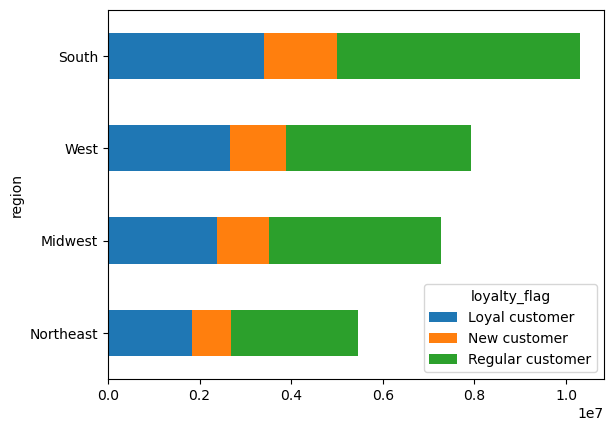

In [17]:
# Creating bar graph
bar_loyalty_by_region = loyalty_by_region.plot.barh(stacked=True)

In [19]:
# Exporting graph
bar_loyalty_by_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_loyalty_by_region.png'))